# Functions used

### Splitting testing, valid and test set

In [1]:
def split1(X, y, mvalid, mtest): # full dataset
    
    # split
    X1, Xtest, y1, ytest = train_test_split(X,y, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [2]:
def split2(Xn, yn, mvalid, mtest): # for noise + full dataset
    
    import random
    
    # split
    X1, Xtest, y1, ytest = train_test_split(Xn,yn, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

In [3]:
def split3(Xn, yn, m, mvalid, mtest): # noise + reduced dataset
    
    import random
    
    # dataset
    n = random.sample(range(1, Xn.shape[0]), m)
    Xn = Xn[n,:] # Xn should be defined
    yn = yn[n]   # yn should be defined
    
    # split
    X1, Xtest, y1, ytest = train_test_split(Xn,yn, test_size = mtest, random_state = 42)
    Xtrain, Xvalid, ytrain, yvalid = train_test_split(X1,y1, test_size = mvalid, random_state = 42)
    
    return [Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest];

### Model Architecture 

In [4]:
def CNN1D(n_timesteps,n_features):
    
    model = Sequential()
    
    # Conv layers
    model.add(Conv1D(filters=16, kernel_size=3, input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    
    # Dense layer
    model.add(Dense(16, activation='relu'))
    
    # output layers
    model.add(Dense(1, activation='sigmoid'))
    
    return model

### Training 

In [5]:
def train(Xtrain, ytrain, Xvalid, yvalid, model, alpha, nepoch, batchsize):
    
    # otherparameters
    m_train = Xtrain.shape[0]
    m_valid = Xvalid.shape[0]
    
    # reshape the array
    Xtrain = np.reshape(Xtrain, (m_train,n_timesteps,n_features)) # n_timesteps and n_feature = defined
    Xvalid = np.reshape(Xvalid, (m_valid,n_timesteps,n_features))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])
    
    # train the model
    
    history = model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=nepoch, batch_size = batchsize, verbose=2, shuffle = True)
    
    return [model, history];

### Plots 

In [67]:
def lossplot(history, lb, ub, font, ep1, ep2):
    
    # Summarize history for loss...
    plt.figure(figsize=(14,8))
    plt.plot(history.history['loss'],'-o')
    plt.plot(history.history['val_loss'],'-s')
    plt.title('Loss curve for 1D-CNN',fontsize=font+2)
    plt.ylabel('Binary cross entropy loss',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'valid'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

def accplot(history, lb, ub, font, ep1, ep2):
    
    # Summarize history for acc...
    plt.figure(figsize=(14,8))
    plt.plot(history.history['acc'],'-o')
    plt.plot(history.history['val_acc'],'-s')
    plt.title('Accuracy curve for 1D-CNN',fontsize=font+2)
    plt.ylabel('Accuracy',fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs',fontsize=font)
    plt.legend(['train', 'valid'], loc='upper right',fontsize=font)
    plt.axis([ep1,ep2,lb,ub])
    return plt.show()

### Confusion matrix 

In [7]:
from sklearn.utils.multiclass import unique_labels
import itertools
import matplotlib.pyplot as plt

fig = plt.gcf()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
      horizontalalignment = 'center',
      color = "white" if cm[i,j] > thresh else "black")

    fig.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

<Figure size 432x288 with 0 Axes>

### Prediction 

In [8]:
def pred(model,Xtest,ytest):
    
    m_test = Xtest.shape[0]    
    Xtest = np.reshape(Xtest,(m_test,n_timesteps,n_features))
    y_predicted = model.predict_classes(Xtest, verbose = 2)
    y_actual = ytest
    
    cm = confusion_matrix(y_actual, y_predicted)
    cm_labels = ['Undamaged','Damaged']
    
    return plot_confusion_matrix(cm, classes=cm_labels, title='Confusion matrix'), print(classification_report(y_actual, y_predicted, target_names = cm_labels))

# 1DCNN for damage classification based on time-history dataset

# Importing APIs

In [9]:
#------------------------------------------imports----------------------------
%matplotlib inline
import random 
import tensorflow as tf

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, MaxPooling1D, Dropout, Lambda 
from tensorflow.keras.layers import Dense, Conv1D, SimpleRNN, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

Using TensorFlow backend.


In [10]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Callbacks

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_loss')<1e-8) and (logs.get('loss')<1e-8):
      print("\nReached perfect accuracy so cancelling training!")
      self.model.stop_training = True

epoch_schedule = myCallback()

In [12]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 5))

# Importing data from drive

In [13]:
df_UD_Ax = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/0_DataSet/Ax2500_UD_03Aug20.txt',header=None)
df_UD_Flex = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/0_DataSet/Flex2500_UD_03Aug20.txt',header=None)
df_D_Ax = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/0_DataSet/Ax2500_D_03Aug20.txt',header=None)
df_D_Flex = pd.read_csv('D:/SDE/1_SDEisotropicDL/CollectData/0_DataSet/Flex2500_D_03Aug20.txt',header=None)

## Plotting dataset

In [14]:
nfft = 1024*8
T = 0.5e-6*nfft
q = 100e3
deltaT = T/nfft
t = np.arange(0,(nfft-1)/nfft,1/nfft)
time = t*T
print(time)

[0.0000e+00 5.0000e-07 1.0000e-06 ... 4.0940e-03 4.0945e-03 4.0950e-03]


### Axial Undamaged 

424


Text(0, 0.5, 'Amplitude')

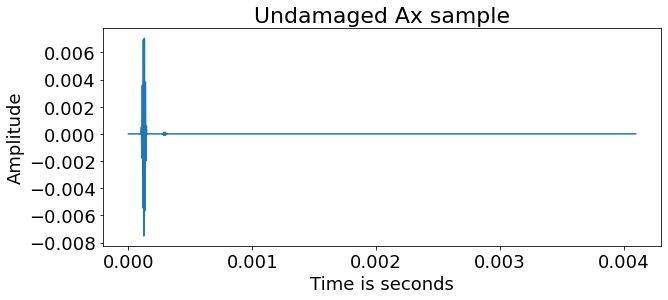

In [15]:
plt.figure(figsize=(10,4))
N = random.randint(1, 2500)
plt.plot(time, df_UD_Ax.iloc[N, 0 : df_UD_Ax.shape[1]-1])
plt.title('Undamaged Ax sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

### Flexural Undamaged 

424


Text(0, 0.5, 'Amplitude')

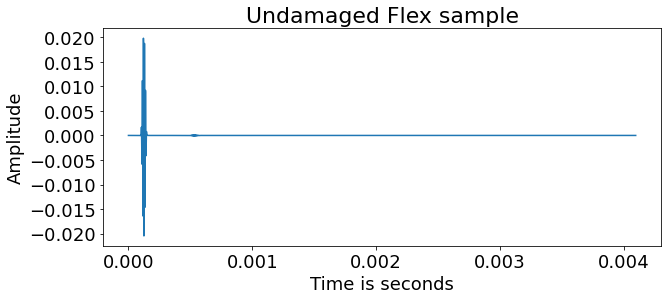

In [16]:
plt.figure(figsize=(10,4))
plt.plot(time, df_UD_Flex.iloc[N, 0 : df_UD_Flex.shape[1]-1])
plt.title('Undamaged Flex sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

### Axial Damaged 

424


Text(0, 0.5, 'Amplitude')

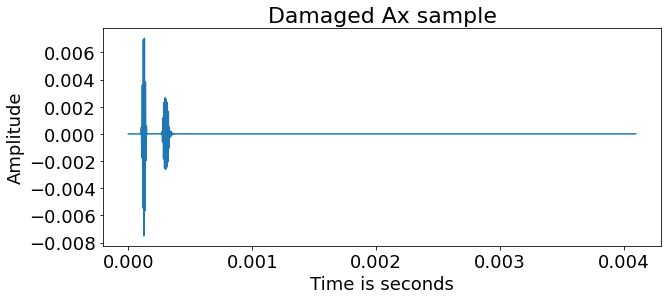

In [17]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Ax.iloc[N, 0 : df_D_Ax.shape[1]-1])
plt.title('Damaged Ax sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

### Flexural Damaged 

424


Text(0, 0.5, 'Amplitude')

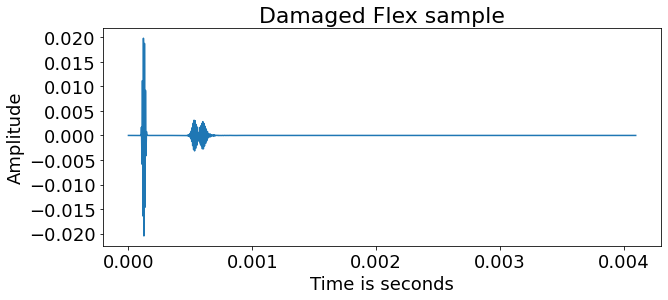

In [18]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Flex.iloc[N, 0 : df_D_Flex.shape[1]-1])
plt.title('Damaged Flex sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

### Combined Axial and Flexural modes

In [19]:
df_D = df_D_Ax + df_D_Flex
df_UD = df_UD_Ax + df_UD_Flex

424


Text(0, 0.5, 'Amplitude')

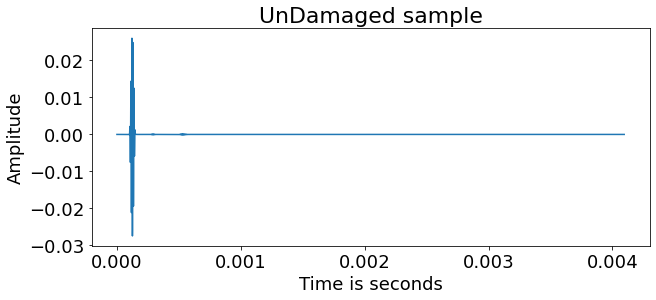

In [20]:
plt.figure(figsize=(10,4))
plt.plot(time, df_UD.iloc[N, 0 : df_UD.shape[1]-1])
plt.title('UnDamaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

424


Text(0, 0.5, 'Amplitude')

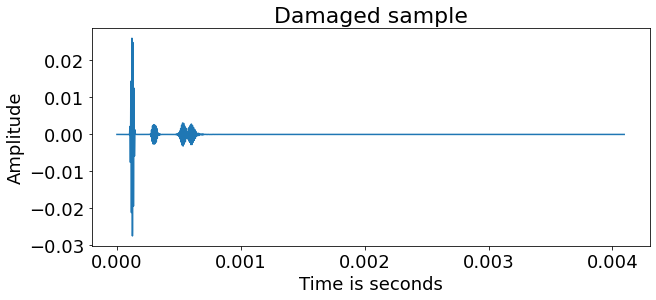

In [21]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D.iloc[N, 0 : df_D.shape[1]-1])
plt.title('Damaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

# training ex = 5000 (Full Dataset without Noise)

## Deciding Features and Labels

In [22]:
index = np.where(time == 1e-03)
index = int(index[0])
print(index)

2000


### Damage

In [23]:
# Input/Features and labels extraction
DAx = df_D_Ax.iloc[:, 0 : index]
DFlex = df_D_Flex.iloc[:, 0 : index]
Dam = DAx + DFlex
# Dam = np.concatenate([DAx,DFlex], axis=1)
Dam = np.array(Dam)
Dam.shape

(2500, 2000)

### Undamage 

In [24]:
# Input/Features and labels extraction
UDAx = df_UD_Ax.iloc[:, 0 : index]
UDFlex = df_UD_Flex.iloc[:, 0 : index]
UDam = UDAx + UDFlex
#UDam = np.concatenate([UDAx,UDFlex], axis=1)
UDam = np.array(UDam)
UDam.shape

(2500, 2000)

### Combined

In [25]:
# Input/Features and labels extraction
X = np.concatenate([UDam,Dam], axis=0)
print(X.shape)

(5000, 2000)


### Labels

In [26]:
y_UD = np.zeros((len(UDam),1), dtype=int)
y_D = np.ones((len(Dam),1), dtype=int)
print(y_UD.shape)
print(y_D.shape)

(2500, 1)
(2500, 1)


In [27]:
# Input/Features and labels extraction
y = np.concatenate([y_UD,y_D], axis=0)
y = np.array(y)
print(y.shape)

(5000, 1)


In [28]:
n_timesteps = index
n_features = 1

## Start the training process 

In [55]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split1(X, y, 0.2, 0.05)
print(Xtrain.shape)
print(Xtest.shape)

(3800, 2000)
(250, 2000)


In [56]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 999, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 498, 32)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 248, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15872)            

In [57]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 64)

Train on 3800 samples, validate on 950 samples
Epoch 1/250
3800/3800 - 1s - loss: 0.6927 - acc: 0.5308 - val_loss: 0.6920 - val_acc: 0.4947
Epoch 2/250
3800/3800 - 0s - loss: 0.6909 - acc: 0.5642 - val_loss: 0.6889 - val_acc: 0.4947
Epoch 3/250
3800/3800 - 0s - loss: 0.6861 - acc: 0.6637 - val_loss: 0.6858 - val_acc: 0.4947
Epoch 4/250
3800/3800 - 0s - loss: 0.6742 - acc: 0.6755 - val_loss: 0.6643 - val_acc: 0.4947
Epoch 5/250
3800/3800 - 0s - loss: 0.6549 - acc: 0.7442 - val_loss: 0.6447 - val_acc: 0.4947
Epoch 6/250
3800/3800 - 0s - loss: 0.6049 - acc: 0.8689 - val_loss: 0.5604 - val_acc: 0.9989
Epoch 7/250
3800/3800 - 0s - loss: 0.5153 - acc: 0.9805 - val_loss: 0.4498 - val_acc: 0.9989
Epoch 8/250
3800/3800 - 0s - loss: 0.3820 - acc: 0.9997 - val_loss: 0.3056 - val_acc: 1.0000
Epoch 9/250
3800/3800 - 0s - loss: 0.2450 - acc: 0.9995 - val_loss: 0.1756 - val_acc: 1.0000
Epoch 10/250
3800/3800 - 0s - loss: 0.1390 - acc: 1.0000 - val_loss: 0.1125 - val_acc: 1.0000
Epoch 11/250
3800/3800

Epoch 84/250
3800/3800 - 0s - loss: 3.1826e-05 - acc: 1.0000 - val_loss: 3.0552e-05 - val_acc: 1.0000
Epoch 85/250
3800/3800 - 0s - loss: 3.0265e-05 - acc: 1.0000 - val_loss: 3.0344e-05 - val_acc: 1.0000
Epoch 86/250
3800/3800 - 0s - loss: 2.9413e-05 - acc: 1.0000 - val_loss: 2.8155e-05 - val_acc: 1.0000
Epoch 87/250
3800/3800 - 0s - loss: 2.7843e-05 - acc: 1.0000 - val_loss: 2.7188e-05 - val_acc: 1.0000
Epoch 88/250
3800/3800 - 0s - loss: 2.6753e-05 - acc: 1.0000 - val_loss: 2.6380e-05 - val_acc: 1.0000
Epoch 89/250
3800/3800 - 0s - loss: 2.5544e-05 - acc: 1.0000 - val_loss: 2.7338e-05 - val_acc: 1.0000
Epoch 90/250
3800/3800 - 0s - loss: 2.4639e-05 - acc: 1.0000 - val_loss: 2.4238e-05 - val_acc: 1.0000
Epoch 91/250
3800/3800 - 0s - loss: 2.3509e-05 - acc: 1.0000 - val_loss: 2.2830e-05 - val_acc: 1.0000
Epoch 92/250
3800/3800 - 0s - loss: 2.4374e-05 - acc: 1.0000 - val_loss: 2.6104e-05 - val_acc: 1.0000
Epoch 93/250
3800/3800 - 0s - loss: 2.4369e-05 - acc: 1.0000 - val_loss: 2.1595e-0

Epoch 164/250
3800/3800 - 0s - loss: 1.5141e-06 - acc: 1.0000 - val_loss: 1.5680e-06 - val_acc: 1.0000
Epoch 165/250
3800/3800 - 0s - loss: 1.4687e-06 - acc: 1.0000 - val_loss: 1.5737e-06 - val_acc: 1.0000
Epoch 166/250
3800/3800 - 0s - loss: 1.4073e-06 - acc: 1.0000 - val_loss: 1.4228e-06 - val_acc: 1.0000
Epoch 167/250
3800/3800 - 0s - loss: 1.3316e-06 - acc: 1.0000 - val_loss: 1.4571e-06 - val_acc: 1.0000
Epoch 168/250
3800/3800 - 0s - loss: 1.3445e-06 - acc: 1.0000 - val_loss: 1.3629e-06 - val_acc: 1.0000
Epoch 169/250
3800/3800 - 0s - loss: 1.2497e-06 - acc: 1.0000 - val_loss: 1.2904e-06 - val_acc: 1.0000
Epoch 170/250
3800/3800 - 0s - loss: 1.2263e-06 - acc: 1.0000 - val_loss: 1.2499e-06 - val_acc: 1.0000
Epoch 171/250
3800/3800 - 0s - loss: 1.1676e-06 - acc: 1.0000 - val_loss: 1.2260e-06 - val_acc: 1.0000
Epoch 172/250
3800/3800 - 0s - loss: 1.1370e-06 - acc: 1.0000 - val_loss: 1.7507e-06 - val_acc: 1.0000
Epoch 173/250
3800/3800 - 0s - loss: 1.2111e-06 - acc: 1.0000 - val_loss:

Epoch 244/250
3800/3800 - 0s - loss: 1.3971e-07 - acc: 1.0000 - val_loss: 1.5228e-07 - val_acc: 1.0000
Epoch 245/250
3800/3800 - 0s - loss: 1.3200e-07 - acc: 1.0000 - val_loss: 1.4485e-07 - val_acc: 1.0000
Epoch 246/250
3800/3800 - 0s - loss: 1.3765e-07 - acc: 1.0000 - val_loss: 1.5116e-07 - val_acc: 1.0000
Epoch 247/250
3800/3800 - 0s - loss: 1.2891e-07 - acc: 1.0000 - val_loss: 1.4662e-07 - val_acc: 1.0000
Epoch 248/250
3800/3800 - 0s - loss: 1.2263e-07 - acc: 1.0000 - val_loss: 2.1636e-07 - val_acc: 1.0000
Epoch 249/250
3800/3800 - 0s - loss: 1.4144e-07 - acc: 1.0000 - val_loss: 1.6967e-07 - val_acc: 1.0000
Epoch 250/250
3800/3800 - 0s - loss: 1.2288e-07 - acc: 1.0000 - val_loss: 1.3867e-07 - val_acc: 1.0000


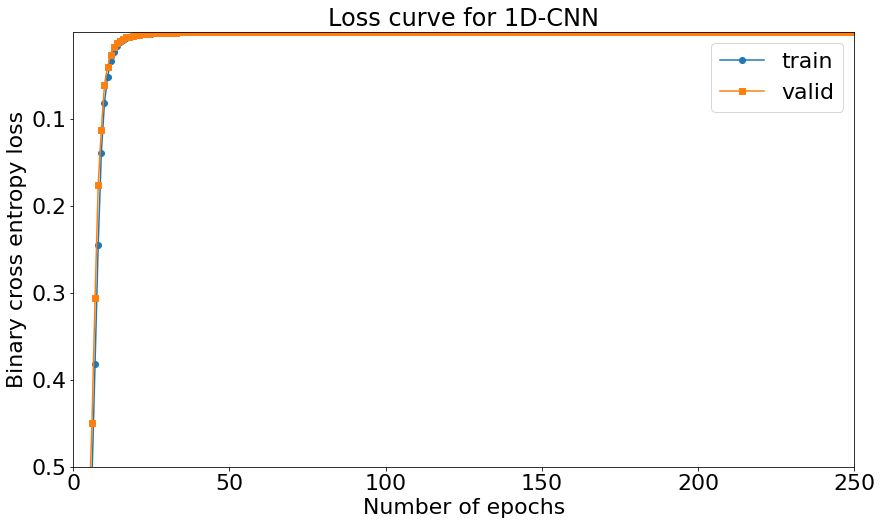

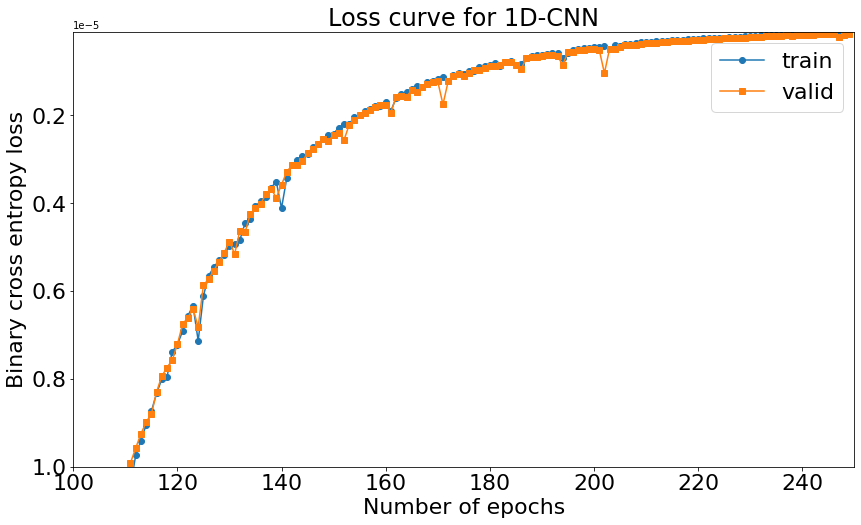

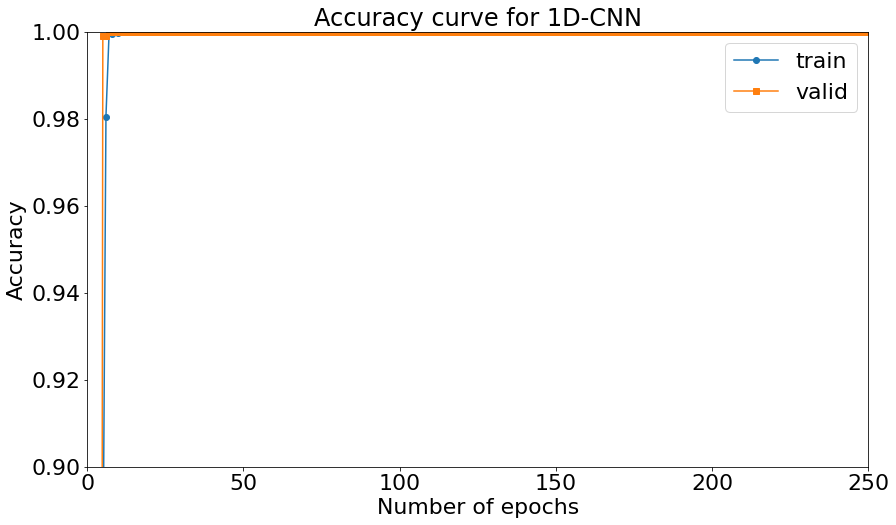

In [73]:
# call lossplot function
lossplot(history, 0.5, 1e-7, 22, 0, 250)
lossplot(history, 1e-5, 1e-7, 22, 100, 250)
# call accplot function
accplot(history, 0.9, 1.0, 22, 0, 250)

250/1 - 0s
Confusion matrix, without normalization
[[126   0]
 [  0 124]]
              precision    recall  f1-score   support

   Undamaged       1.00      1.00      1.00       126
     Damaged       1.00      1.00      1.00       124

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



(None, None)

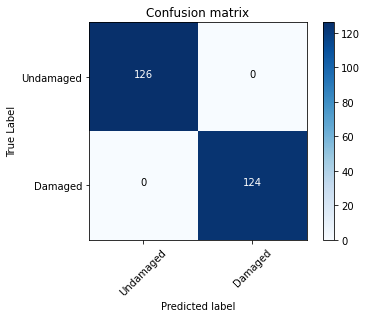

In [74]:
# call pred function
pred(model,Xtest,ytest)

In [ ]:
# weights
layer_weights = model.layers[0].get_weights()[0]
print(layer_weights.shape)
print(layer_weights)

In [ ]:
# biases
layer_biases  = model.layers[0].get_weights()[1]
print(layer_biases.shape)
print(layer_biases)

# Dataset with Noise (m=5000 + 3 different levels on Noise)

## Noise

In [75]:
#---Random gaussian noise parameter
beta1 = 0.01
beta2 = 0.02
beta3 = 0.03
mu = 0
sigma = 1
r = sigma*np.random.randn(n_timesteps,1) + mu   #random parameter with gaussian distribution
r = np.transpose(r)

#---Noisy signal
n1 = beta1*r*np.max(X)
n2 = beta2*r*np.max(X)
n3 = beta3*r*np.max(X)
Xn1 = X + n1
Xn2 = X + n2
Xn3 = X + n3

#---Signal to noise ratio
import math

rms_Xn = np.sqrt(np.mean(Xn1**2))
Power_Xn = rms_Xn**2

rms_n = np.sqrt(np.mean(n1**2))
Power_n = rms_n**2

SNR_dB = 10*math.log10(Power_Xn/Power_n)
print("SNR : ",SNR_dB)

SNR :  20.32007799073538


3077
Damaged


Text(0.5, 1.0, 'Noise')

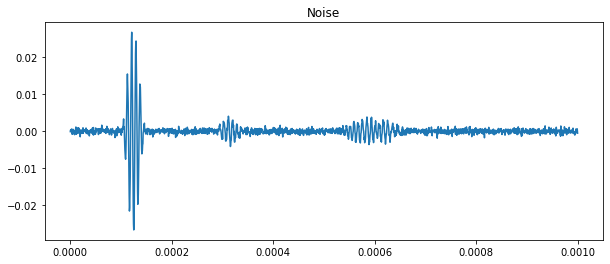

In [82]:
#---Plot non-noisy signal
N = random.randint(1, 5000)
print(N)
if N<2500:
    print('Undamaged')
else:
    print('Damaged')
plt.figure(figsize=(10,4))
plt.plot(time[0 : index], Xn2[N, 0 : index])
plt.title('Noise')

## New dataset 

In [83]:
Xn = np.concatenate([X,Xn1,Xn2,Xn3], axis=0)
yn = np.concatenate([y,y,y,y], axis=0)
print(Xn.shape)
print(yn.shape)

(20000, 2000)
(20000, 1)


# m = 20000

In [84]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split2(Xn,yn,0.2,0.05)
print(Xtrain.shape)
print(Xtest.shape)

(15200, 2000)
(1000, 2000)


In [85]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 999, 16)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 498, 32)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 248, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15872)            

In [86]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 64)

Train on 15200 samples, validate on 3800 samples
Epoch 1/250
15200/15200 - 2s - loss: 0.6893 - acc: 0.5398 - val_loss: 0.6760 - val_acc: 0.8787
Epoch 2/250
15200/15200 - 1s - loss: 0.5856 - acc: 0.7782 - val_loss: 0.4278 - val_acc: 1.0000
Epoch 3/250
15200/15200 - 1s - loss: 0.2241 - acc: 0.9976 - val_loss: 0.0875 - val_acc: 1.0000
Epoch 4/250
15200/15200 - 1s - loss: 0.0482 - acc: 0.9999 - val_loss: 0.0259 - val_acc: 1.0000
Epoch 5/250
15200/15200 - 1s - loss: 0.0175 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 6/250
15200/15200 - 1s - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 7/250
15200/15200 - 1s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 8/250
15200/15200 - 1s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 9/250
15200/15200 - 1s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 10/250
15200/15200 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000


Epoch 81/250
15200/15200 - 1s - loss: 5.2954e-08 - acc: 1.0000 - val_loss: 6.5585e-08 - val_acc: 1.0000
Epoch 82/250
15200/15200 - 1s - loss: 4.8049e-08 - acc: 1.0000 - val_loss: 5.1811e-08 - val_acc: 1.0000
Epoch 83/250
15200/15200 - 1s - loss: 4.3341e-08 - acc: 1.0000 - val_loss: 4.7850e-08 - val_acc: 1.0000
Epoch 84/250
15200/15200 - 1s - loss: 3.8382e-08 - acc: 1.0000 - val_loss: 4.1967e-08 - val_acc: 1.0000
Epoch 85/250
15200/15200 - 1s - loss: 3.3854e-08 - acc: 1.0000 - val_loss: 3.8391e-08 - val_acc: 1.0000
Epoch 86/250
15200/15200 - 1s - loss: 3.0029e-08 - acc: 1.0000 - val_loss: 3.4772e-08 - val_acc: 1.0000
Epoch 87/250
15200/15200 - 1s - loss: 2.9062e-08 - acc: 1.0000 - val_loss: 3.2186e-08 - val_acc: 1.0000
Epoch 88/250
15200/15200 - 1s - loss: 2.5496e-08 - acc: 1.0000 - val_loss: 2.7652e-08 - val_acc: 1.0000
Epoch 89/250
15200/15200 - 1s - loss: 2.2397e-08 - acc: 1.0000 - val_loss: 2.7217e-08 - val_acc: 1.0000
Epoch 90/250
15200/15200 - 1s - loss: 2.0809e-08 - acc: 1.0000 -

Epoch 160/250
15200/15200 - 1s - loss: 5.3324e-10 - acc: 1.0000 - val_loss: 7.7032e-10 - val_acc: 1.0000
Epoch 161/250
15200/15200 - 1s - loss: 5.1622e-10 - acc: 1.0000 - val_loss: 6.3031e-10 - val_acc: 1.0000
Epoch 162/250
15200/15200 - 1s - loss: 5.8636e-10 - acc: 1.0000 - val_loss: 7.9414e-10 - val_acc: 1.0000
Epoch 163/250
15200/15200 - 1s - loss: 5.1450e-10 - acc: 1.0000 - val_loss: 6.4412e-10 - val_acc: 1.0000
Epoch 164/250
15200/15200 - 1s - loss: 6.2144e-10 - acc: 1.0000 - val_loss: 8.3635e-10 - val_acc: 1.0000
Epoch 165/250
15200/15200 - 1s - loss: 6.0419e-10 - acc: 1.0000 - val_loss: 8.3657e-10 - val_acc: 1.0000
Epoch 166/250
15200/15200 - 1s - loss: 5.0421e-10 - acc: 1.0000 - val_loss: 5.9459e-10 - val_acc: 1.0000
Epoch 167/250
15200/15200 - 1s - loss: 6.8560e-10 - acc: 1.0000 - val_loss: 5.9396e-10 - val_acc: 1.0000
Epoch 168/250
15200/15200 - 1s - loss: 4.5513e-10 - acc: 1.0000 - val_loss: 9.0654e-10 - val_acc: 1.0000
Epoch 169/250
15200/15200 - 1s - loss: 5.1006e-10 - acc

15200/15200 - 1s - loss: 5.9654e-08 - acc: 1.0000 - val_loss: 1.0167e-07 - val_acc: 1.0000
Epoch 239/250
15200/15200 - 1s - loss: 5.3322e-08 - acc: 1.0000 - val_loss: 7.4337e-08 - val_acc: 1.0000
Epoch 240/250
15200/15200 - 1s - loss: 4.7581e-08 - acc: 1.0000 - val_loss: 8.2721e-08 - val_acc: 1.0000
Epoch 241/250
15200/15200 - 1s - loss: 4.2329e-08 - acc: 1.0000 - val_loss: 6.1354e-08 - val_acc: 1.0000
Epoch 242/250
15200/15200 - 1s - loss: 3.8580e-08 - acc: 1.0000 - val_loss: 5.4104e-08 - val_acc: 1.0000
Epoch 243/250
15200/15200 - 1s - loss: 3.4218e-08 - acc: 1.0000 - val_loss: 5.0616e-08 - val_acc: 1.0000
Epoch 244/250
15200/15200 - 1s - loss: 3.1148e-08 - acc: 1.0000 - val_loss: 4.4114e-08 - val_acc: 1.0000
Epoch 245/250
15200/15200 - 1s - loss: 2.7374e-08 - acc: 1.0000 - val_loss: 4.3807e-08 - val_acc: 1.0000
Epoch 246/250
15200/15200 - 1s - loss: 2.4491e-08 - acc: 1.0000 - val_loss: 3.9020e-08 - val_acc: 1.0000
Epoch 247/250
15200/15200 - 1s - loss: 2.1700e-08 - acc: 1.0000 - val

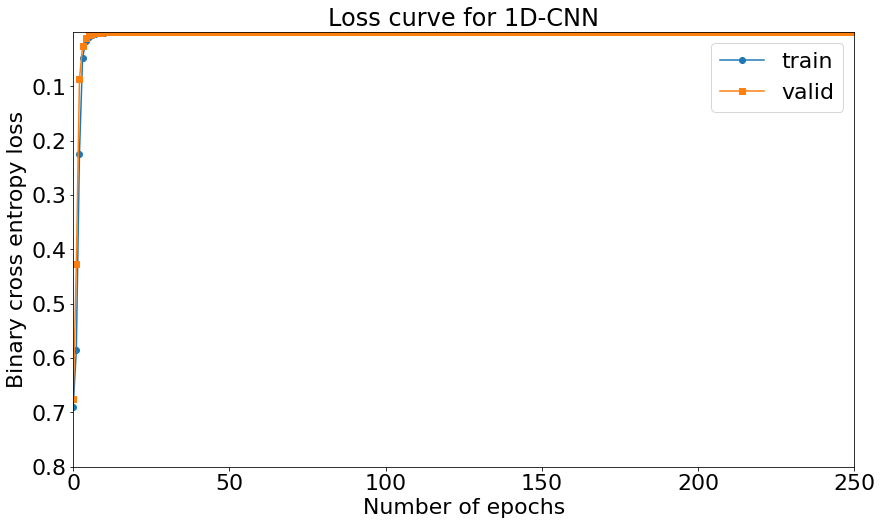

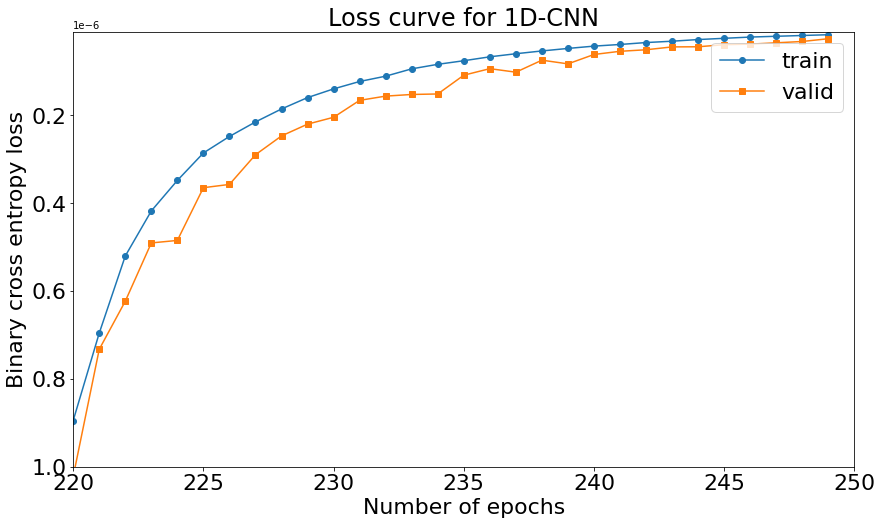

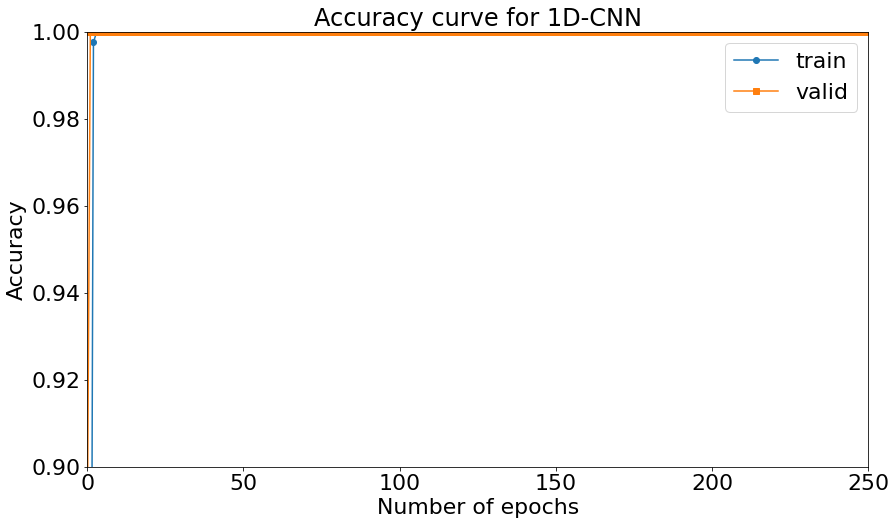

In [94]:
# call lossplot function
lossplot(history, 0.8, 1e-7, 22, 0, 250)
lossplot(history, 1e-6, 1e-8, 22, 220, 250)
# call accplot function
accplot(history, 0.9, 1.0, 22, 0, 250)

1000/1 - 0s
Confusion matrix, without normalization
[[481   0]
 [  0 519]]
              precision    recall  f1-score   support

   Undamaged       1.00      1.00      1.00       481
     Damaged       1.00      1.00      1.00       519

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



(None, None)

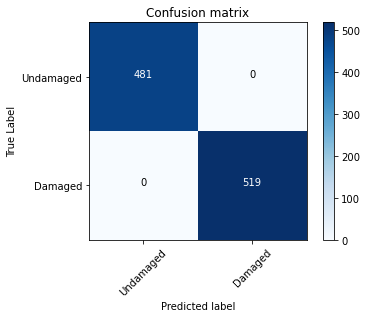

In [95]:
# call pred function
pred(model,Xtest,ytest)

# m = 10000

In [102]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn,yn,10000,0.2,0.05)
print(Xtrain.shape)
print(Xtest.shape)

(7600, 2000)
(500, 2000)


In [103]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15872)            

In [104]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 64)

Train on 7600 samples, validate on 1900 samples
Epoch 1/250
7600/7600 - 1s - loss: 0.6928 - acc: 0.5641 - val_loss: 0.6920 - val_acc: 0.4984
Epoch 2/250
7600/7600 - 1s - loss: 0.6900 - acc: 0.6057 - val_loss: 0.6861 - val_acc: 1.0000
Epoch 3/250
7600/7600 - 1s - loss: 0.6727 - acc: 0.7358 - val_loss: 0.6509 - val_acc: 0.8758
Epoch 4/250
7600/7600 - 1s - loss: 0.5995 - acc: 0.8720 - val_loss: 0.5206 - val_acc: 0.8758
Epoch 5/250
7600/7600 - 1s - loss: 0.4232 - acc: 0.9782 - val_loss: 0.3094 - val_acc: 1.0000
Epoch 6/250
7600/7600 - 1s - loss: 0.2270 - acc: 0.9989 - val_loss: 0.1477 - val_acc: 1.0000
Epoch 7/250
7600/7600 - 1s - loss: 0.1092 - acc: 0.9997 - val_loss: 0.0750 - val_acc: 1.0000
Epoch 8/250
7600/7600 - 1s - loss: 0.0577 - acc: 0.9999 - val_loss: 0.0418 - val_acc: 1.0000
Epoch 9/250
7600/7600 - 1s - loss: 0.0338 - acc: 0.9999 - val_loss: 0.0252 - val_acc: 1.0000
Epoch 10/250
7600/7600 - 1s - loss: 0.0221 - acc: 1.0000 - val_loss: 0.0167 - val_acc: 1.0000
Epoch 11/250
7600/760

Epoch 83/250
7600/7600 - 1s - loss: 8.1027e-06 - acc: 1.0000 - val_loss: 7.3558e-06 - val_acc: 1.0000
Epoch 84/250
7600/7600 - 1s - loss: 7.4746e-06 - acc: 1.0000 - val_loss: 6.9151e-06 - val_acc: 1.0000
Epoch 85/250
7600/7600 - 1s - loss: 7.0648e-06 - acc: 1.0000 - val_loss: 6.4908e-06 - val_acc: 1.0000
Epoch 86/250
7600/7600 - 1s - loss: 6.5754e-06 - acc: 1.0000 - val_loss: 6.0271e-06 - val_acc: 1.0000
Epoch 87/250
7600/7600 - 1s - loss: 6.1034e-06 - acc: 1.0000 - val_loss: 5.6184e-06 - val_acc: 1.0000
Epoch 88/250
7600/7600 - 1s - loss: 5.7382e-06 - acc: 1.0000 - val_loss: 5.2924e-06 - val_acc: 1.0000
Epoch 89/250
7600/7600 - 1s - loss: 5.3505e-06 - acc: 1.0000 - val_loss: 4.8847e-06 - val_acc: 1.0000
Epoch 90/250
7600/7600 - 1s - loss: 4.9566e-06 - acc: 1.0000 - val_loss: 4.5981e-06 - val_acc: 1.0000
Epoch 91/250
7600/7600 - 1s - loss: 4.5979e-06 - acc: 1.0000 - val_loss: 4.3913e-06 - val_acc: 1.0000
Epoch 92/250
7600/7600 - 1s - loss: 4.3900e-06 - acc: 1.0000 - val_loss: 4.0003e-0

Epoch 163/250
7600/7600 - 1s - loss: 5.6854e-08 - acc: 1.0000 - val_loss: 5.7646e-08 - val_acc: 1.0000
Epoch 164/250
7600/7600 - 1s - loss: 5.2882e-08 - acc: 1.0000 - val_loss: 5.3913e-08 - val_acc: 1.0000
Epoch 165/250
7600/7600 - 1s - loss: 4.9913e-08 - acc: 1.0000 - val_loss: 5.4751e-08 - val_acc: 1.0000
Epoch 166/250
7600/7600 - 1s - loss: 4.7699e-08 - acc: 1.0000 - val_loss: 4.8381e-08 - val_acc: 1.0000
Epoch 167/250
7600/7600 - 1s - loss: 4.5590e-08 - acc: 1.0000 - val_loss: 4.6527e-08 - val_acc: 1.0000
Epoch 168/250
7600/7600 - 1s - loss: 4.5020e-08 - acc: 1.0000 - val_loss: 4.8339e-08 - val_acc: 1.0000
Epoch 169/250
7600/7600 - 1s - loss: 4.1478e-08 - acc: 1.0000 - val_loss: 4.1158e-08 - val_acc: 1.0000
Epoch 170/250
7600/7600 - 1s - loss: 3.8079e-08 - acc: 1.0000 - val_loss: 3.9924e-08 - val_acc: 1.0000
Epoch 171/250
7600/7600 - 1s - loss: 3.6681e-08 - acc: 1.0000 - val_loss: 3.8245e-08 - val_acc: 1.0000
Epoch 172/250
7600/7600 - 1s - loss: 3.4903e-08 - acc: 1.0000 - val_loss:

Epoch 243/250
7600/7600 - 1s - loss: 1.7052e-09 - acc: 1.0000 - val_loss: 3.4653e-09 - val_acc: 1.0000
Epoch 244/250
7600/7600 - 1s - loss: 1.8540e-09 - acc: 1.0000 - val_loss: 1.6689e-09 - val_acc: 1.0000
Epoch 245/250
7600/7600 - 1s - loss: 1.7512e-09 - acc: 1.0000 - val_loss: 2.6664e-09 - val_acc: 1.0000
Epoch 246/250
7600/7600 - 1s - loss: 1.5720e-09 - acc: 1.0000 - val_loss: 1.6347e-09 - val_acc: 1.0000
Epoch 247/250
7600/7600 - 1s - loss: 1.5076e-09 - acc: 1.0000 - val_loss: 3.9117e-09 - val_acc: 1.0000
Epoch 248/250
7600/7600 - 1s - loss: 1.6776e-09 - acc: 1.0000 - val_loss: 1.9569e-09 - val_acc: 1.0000
Epoch 249/250
7600/7600 - 1s - loss: 1.5277e-09 - acc: 1.0000 - val_loss: 1.6308e-09 - val_acc: 1.0000
Epoch 250/250
7600/7600 - 1s - loss: 1.5769e-09 - acc: 1.0000 - val_loss: 1.4328e-09 - val_acc: 1.0000


In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 5000

In [105]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 5000, 0.2, 0.05)
print(Xtrain.shape)
print(Xtest.shape)

(3800, 2000)
(250, 2000)


In [106]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15872)            

In [107]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 16)

Train on 3800 samples, validate on 950 samples
Epoch 1/250
3800/3800 - 1s - loss: 0.6931 - acc: 0.5145 - val_loss: 0.6927 - val_acc: 0.5126
Epoch 2/250
3800/3800 - 1s - loss: 0.6922 - acc: 0.5511 - val_loss: 0.6892 - val_acc: 0.5126
Epoch 3/250
3800/3800 - 1s - loss: 0.6768 - acc: 0.6384 - val_loss: 0.6464 - val_acc: 0.7579
Epoch 4/250
3800/3800 - 1s - loss: 0.5366 - acc: 0.9445 - val_loss: 0.3769 - val_acc: 0.9874
Epoch 5/250
3800/3800 - 1s - loss: 0.2250 - acc: 0.9976 - val_loss: 0.1348 - val_acc: 1.0000
Epoch 6/250
3800/3800 - 1s - loss: 0.0711 - acc: 0.9995 - val_loss: 0.0422 - val_acc: 1.0000
Epoch 7/250
3800/3800 - 1s - loss: 0.0293 - acc: 1.0000 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 8/250
3800/3800 - 1s - loss: 0.0157 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 9/250
3800/3800 - 1s - loss: 0.0094 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 10/250
3800/3800 - 1s - loss: 0.0063 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 11/250
3800/3800

Epoch 83/250
3800/3800 - 1s - loss: 8.3800e-08 - acc: 1.0000 - val_loss: 1.0176e-07 - val_acc: 1.0000
Epoch 84/250
3800/3800 - 1s - loss: 8.3744e-08 - acc: 1.0000 - val_loss: 9.8005e-08 - val_acc: 1.0000
Epoch 85/250
3800/3800 - 1s - loss: 6.9721e-08 - acc: 1.0000 - val_loss: 1.4725e-07 - val_acc: 1.0000
Epoch 86/250
3800/3800 - 1s - loss: 6.8376e-08 - acc: 1.0000 - val_loss: 7.5083e-08 - val_acc: 1.0000
Epoch 87/250
3800/3800 - 1s - loss: 7.4415e-08 - acc: 1.0000 - val_loss: 7.5628e-08 - val_acc: 1.0000
Epoch 88/250
3800/3800 - 1s - loss: 6.2416e-08 - acc: 1.0000 - val_loss: 5.8215e-08 - val_acc: 1.0000
Epoch 89/250
3800/3800 - 1s - loss: 4.5524e-08 - acc: 1.0000 - val_loss: 8.5750e-08 - val_acc: 1.0000
Epoch 90/250
3800/3800 - 1s - loss: 4.5042e-08 - acc: 1.0000 - val_loss: 4.7127e-08 - val_acc: 1.0000
Epoch 91/250
3800/3800 - 1s - loss: 3.7337e-08 - acc: 1.0000 - val_loss: 6.1244e-08 - val_acc: 1.0000
Epoch 92/250
3800/3800 - 1s - loss: 4.0118e-08 - acc: 1.0000 - val_loss: 5.4016e-0

Epoch 163/250
3800/3800 - 1s - loss: 7.2074e-10 - acc: 1.0000 - val_loss: 8.7351e-10 - val_acc: 1.0000
Epoch 164/250
3800/3800 - 1s - loss: 2.8521e-09 - acc: 1.0000 - val_loss: 7.1957e-08 - val_acc: 1.0000
Epoch 165/250
3800/3800 - 1s - loss: 2.5563e-09 - acc: 1.0000 - val_loss: 7.0930e-10 - val_acc: 1.0000
Epoch 166/250
3800/3800 - 1s - loss: 4.0183e-10 - acc: 1.0000 - val_loss: 4.5219e-10 - val_acc: 1.0000
Epoch 167/250
3800/3800 - 1s - loss: 4.5914e-10 - acc: 1.0000 - val_loss: 6.3840e-10 - val_acc: 1.0000
Epoch 168/250
3800/3800 - 1s - loss: 3.4315e-10 - acc: 1.0000 - val_loss: 1.3220e-09 - val_acc: 1.0000
Epoch 169/250
3800/3800 - 1s - loss: 5.2297e-10 - acc: 1.0000 - val_loss: 9.6353e-10 - val_acc: 1.0000
Epoch 170/250
3800/3800 - 1s - loss: 4.8501e-10 - acc: 1.0000 - val_loss: 1.0330e-09 - val_acc: 1.0000
Epoch 171/250
3800/3800 - 1s - loss: 6.5488e-10 - acc: 1.0000 - val_loss: 1.4277e-09 - val_acc: 1.0000
Epoch 172/250
3800/3800 - 1s - loss: 4.3476e-10 - acc: 1.0000 - val_loss:

Epoch 243/250
3800/3800 - 1s - loss: 7.9590e-10 - acc: 1.0000 - val_loss: 1.7250e-09 - val_acc: 1.0000
Epoch 244/250
3800/3800 - 1s - loss: 7.3595e-10 - acc: 1.0000 - val_loss: 1.9486e-09 - val_acc: 1.0000
Epoch 245/250
3800/3800 - 1s - loss: 7.7415e-10 - acc: 1.0000 - val_loss: 1.4152e-09 - val_acc: 1.0000
Epoch 246/250
3800/3800 - 1s - loss: 7.3589e-10 - acc: 1.0000 - val_loss: 1.2957e-09 - val_acc: 1.0000
Epoch 247/250
3800/3800 - 1s - loss: 6.7353e-10 - acc: 1.0000 - val_loss: 1.6067e-09 - val_acc: 1.0000
Epoch 248/250
3800/3800 - 1s - loss: 6.7910e-10 - acc: 1.0000 - val_loss: 1.5055e-09 - val_acc: 1.0000
Epoch 249/250
3800/3800 - 1s - loss: 6.5200e-10 - acc: 1.0000 - val_loss: 1.1815e-09 - val_acc: 1.0000
Epoch 250/250
3800/3800 - 1s - loss: 6.2920e-10 - acc: 1.0000 - val_loss: 1.1986e-09 - val_acc: 1.0000


In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 2500

In [108]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 2500, 0.2, 0.05)
print(Xtrain.shape)
print(Xtest.shape)

(1900, 2000)
(125, 2000)


In [109]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 15872)            

In [110]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 32)

Train on 1900 samples, validate on 475 samples
Epoch 1/250
1900/1900 - 1s - loss: 0.6930 - acc: 0.5126 - val_loss: 0.6926 - val_acc: 0.5263
Epoch 2/250
1900/1900 - 0s - loss: 0.6936 - acc: 0.5089 - val_loss: 0.6927 - val_acc: 0.5263
Epoch 3/250
1900/1900 - 0s - loss: 0.6928 - acc: 0.5089 - val_loss: 0.6921 - val_acc: 0.5263
Epoch 4/250
1900/1900 - 0s - loss: 0.6926 - acc: 0.5089 - val_loss: 0.6916 - val_acc: 0.5263
Epoch 5/250
1900/1900 - 0s - loss: 0.6923 - acc: 0.5089 - val_loss: 0.6909 - val_acc: 0.5263
Epoch 6/250
1900/1900 - 0s - loss: 0.6917 - acc: 0.5089 - val_loss: 0.6903 - val_acc: 0.5263
Epoch 7/250
1900/1900 - 0s - loss: 0.6905 - acc: 0.5321 - val_loss: 0.6877 - val_acc: 0.5263
Epoch 8/250
1900/1900 - 0s - loss: 0.6869 - acc: 0.5595 - val_loss: 0.6812 - val_acc: 0.5263
Epoch 9/250
1900/1900 - 0s - loss: 0.6777 - acc: 0.6147 - val_loss: 0.6670 - val_acc: 1.0000
Epoch 10/250
1900/1900 - 0s - loss: 0.6534 - acc: 0.7921 - val_loss: 0.6259 - val_acc: 0.6463
Epoch 11/250
1900/1900

Epoch 85/250
1900/1900 - 0s - loss: 1.4572e-04 - acc: 1.0000 - val_loss: 1.2085e-04 - val_acc: 1.0000
Epoch 86/250
1900/1900 - 0s - loss: 1.3867e-04 - acc: 1.0000 - val_loss: 1.1540e-04 - val_acc: 1.0000
Epoch 87/250
1900/1900 - 0s - loss: 1.3238e-04 - acc: 1.0000 - val_loss: 1.1158e-04 - val_acc: 1.0000
Epoch 88/250
1900/1900 - 0s - loss: 1.2708e-04 - acc: 1.0000 - val_loss: 1.0573e-04 - val_acc: 1.0000
Epoch 89/250
1900/1900 - 0s - loss: 1.2188e-04 - acc: 1.0000 - val_loss: 1.0140e-04 - val_acc: 1.0000
Epoch 90/250
1900/1900 - 0s - loss: 1.1601e-04 - acc: 1.0000 - val_loss: 9.7518e-05 - val_acc: 1.0000
Epoch 91/250
1900/1900 - 0s - loss: 1.1144e-04 - acc: 1.0000 - val_loss: 9.3115e-05 - val_acc: 1.0000
Epoch 92/250
1900/1900 - 0s - loss: 1.0601e-04 - acc: 1.0000 - val_loss: 8.9291e-05 - val_acc: 1.0000
Epoch 93/250
1900/1900 - 0s - loss: 1.0164e-04 - acc: 1.0000 - val_loss: 8.5572e-05 - val_acc: 1.0000
Epoch 94/250
1900/1900 - 0s - loss: 9.7798e-05 - acc: 1.0000 - val_loss: 8.2319e-0

Epoch 165/250
1900/1900 - 0s - loss: 6.0053e-06 - acc: 1.0000 - val_loss: 5.9145e-06 - val_acc: 1.0000
Epoch 166/250
1900/1900 - 0s - loss: 5.7730e-06 - acc: 1.0000 - val_loss: 5.7411e-06 - val_acc: 1.0000
Epoch 167/250
1900/1900 - 0s - loss: 5.5750e-06 - acc: 1.0000 - val_loss: 5.5558e-06 - val_acc: 1.0000
Epoch 168/250
1900/1900 - 0s - loss: 5.4071e-06 - acc: 1.0000 - val_loss: 5.3773e-06 - val_acc: 1.0000
Epoch 169/250
1900/1900 - 0s - loss: 5.2194e-06 - acc: 1.0000 - val_loss: 5.2266e-06 - val_acc: 1.0000
Epoch 170/250
1900/1900 - 0s - loss: 5.0411e-06 - acc: 1.0000 - val_loss: 5.1632e-06 - val_acc: 1.0000
Epoch 171/250
1900/1900 - 0s - loss: 4.8584e-06 - acc: 1.0000 - val_loss: 4.8976e-06 - val_acc: 1.0000
Epoch 172/250
1900/1900 - 0s - loss: 4.7819e-06 - acc: 1.0000 - val_loss: 4.7037e-06 - val_acc: 1.0000
Epoch 173/250
1900/1900 - 0s - loss: 4.5160e-06 - acc: 1.0000 - val_loss: 4.5493e-06 - val_acc: 1.0000
Epoch 174/250
1900/1900 - 0s - loss: 4.3948e-06 - acc: 1.0000 - val_loss:

Epoch 245/250
1900/1900 - 0s - loss: 4.3154e-07 - acc: 1.0000 - val_loss: 4.9902e-07 - val_acc: 1.0000
Epoch 246/250
1900/1900 - 0s - loss: 4.1748e-07 - acc: 1.0000 - val_loss: 5.0446e-07 - val_acc: 1.0000
Epoch 247/250
1900/1900 - 0s - loss: 4.0861e-07 - acc: 1.0000 - val_loss: 4.8512e-07 - val_acc: 1.0000
Epoch 248/250
1900/1900 - 0s - loss: 3.9695e-07 - acc: 1.0000 - val_loss: 4.6654e-07 - val_acc: 1.0000
Epoch 249/250
1900/1900 - 0s - loss: 3.8454e-07 - acc: 1.0000 - val_loss: 4.4656e-07 - val_acc: 1.0000
Epoch 250/250
1900/1900 - 0s - loss: 3.7567e-07 - acc: 1.0000 - val_loss: 4.3173e-07 - val_acc: 1.0000


In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 1250

In [111]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 1250, 0.2, 0.05)
print(Xtrain.shape)
print(Xtest.shape)

(949, 2000)
(63, 2000)


In [112]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 15872)            

In [113]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 16)

Train on 949 samples, validate on 238 samples
Epoch 1/250
949/949 - 1s - loss: 0.6930 - acc: 0.5016 - val_loss: 0.6923 - val_acc: 0.5168
Epoch 2/250
949/949 - 0s - loss: 0.6925 - acc: 0.5090 - val_loss: 0.6916 - val_acc: 0.5168
Epoch 3/250
949/949 - 0s - loss: 0.6918 - acc: 0.5090 - val_loss: 0.6903 - val_acc: 0.5168
Epoch 4/250
949/949 - 0s - loss: 0.6918 - acc: 0.5090 - val_loss: 0.6903 - val_acc: 0.5168
Epoch 5/250
949/949 - 0s - loss: 0.6893 - acc: 0.5090 - val_loss: 0.6869 - val_acc: 0.5168
Epoch 6/250
949/949 - 0s - loss: 0.6865 - acc: 0.5090 - val_loss: 0.6827 - val_acc: 0.5168
Epoch 7/250
949/949 - 0s - loss: 0.6823 - acc: 0.5121 - val_loss: 0.6752 - val_acc: 0.5168
Epoch 8/250
949/949 - 0s - loss: 0.6732 - acc: 0.5458 - val_loss: 0.6631 - val_acc: 0.5168
Epoch 9/250
949/949 - 0s - loss: 0.6579 - acc: 0.5648 - val_loss: 0.6468 - val_acc: 0.6345
Epoch 10/250
949/949 - 0s - loss: 0.6345 - acc: 0.5964 - val_loss: 0.6108 - val_acc: 0.5168
Epoch 11/250
949/949 - 0s - loss: 0.5880 - 

Epoch 87/250
949/949 - 0s - loss: 1.6852e-04 - acc: 1.0000 - val_loss: 1.5231e-04 - val_acc: 1.0000
Epoch 88/250
949/949 - 0s - loss: 1.6225e-04 - acc: 1.0000 - val_loss: 1.4557e-04 - val_acc: 1.0000
Epoch 89/250
949/949 - 0s - loss: 1.5431e-04 - acc: 1.0000 - val_loss: 1.4100e-04 - val_acc: 1.0000
Epoch 90/250
949/949 - 0s - loss: 1.4637e-04 - acc: 1.0000 - val_loss: 1.3982e-04 - val_acc: 1.0000
Epoch 91/250
949/949 - 0s - loss: 1.4061e-04 - acc: 1.0000 - val_loss: 1.2992e-04 - val_acc: 1.0000
Epoch 92/250
949/949 - 0s - loss: 1.3539e-04 - acc: 1.0000 - val_loss: 1.2300e-04 - val_acc: 1.0000
Epoch 93/250
949/949 - 0s - loss: 1.3003e-04 - acc: 1.0000 - val_loss: 1.2012e-04 - val_acc: 1.0000
Epoch 94/250
949/949 - 0s - loss: 1.2507e-04 - acc: 1.0000 - val_loss: 1.1394e-04 - val_acc: 1.0000
Epoch 95/250
949/949 - 0s - loss: 1.1856e-04 - acc: 1.0000 - val_loss: 1.1028e-04 - val_acc: 1.0000
Epoch 96/250
949/949 - 0s - loss: 1.1417e-04 - acc: 1.0000 - val_loss: 1.0863e-04 - val_acc: 1.0000


Epoch 169/250
949/949 - 0s - loss: 7.2067e-06 - acc: 1.0000 - val_loss: 8.3345e-06 - val_acc: 1.0000
Epoch 170/250
949/949 - 0s - loss: 6.8346e-06 - acc: 1.0000 - val_loss: 7.5538e-06 - val_acc: 1.0000
Epoch 171/250
949/949 - 0s - loss: 6.6136e-06 - acc: 1.0000 - val_loss: 7.2380e-06 - val_acc: 1.0000
Epoch 172/250
949/949 - 0s - loss: 6.3765e-06 - acc: 1.0000 - val_loss: 7.2180e-06 - val_acc: 1.0000
Epoch 173/250
949/949 - 0s - loss: 6.1799e-06 - acc: 1.0000 - val_loss: 6.8332e-06 - val_acc: 1.0000
Epoch 174/250
949/949 - 0s - loss: 5.9655e-06 - acc: 1.0000 - val_loss: 6.4513e-06 - val_acc: 1.0000
Epoch 175/250
949/949 - 0s - loss: 5.8397e-06 - acc: 1.0000 - val_loss: 6.5238e-06 - val_acc: 1.0000
Epoch 176/250
949/949 - 0s - loss: 5.6091e-06 - acc: 1.0000 - val_loss: 6.1184e-06 - val_acc: 1.0000
Epoch 177/250
949/949 - 0s - loss: 5.2933e-06 - acc: 1.0000 - val_loss: 6.4818e-06 - val_acc: 1.0000
Epoch 178/250
949/949 - 0s - loss: 5.2663e-06 - acc: 1.0000 - val_loss: 5.6120e-06 - val_ac

In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 625

In [116]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 625, 0.2, 0.05)
print(Xtrain.shape)
print(Xtest.shape)

(474, 2000)
(32, 2000)


In [117]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 15872)            

In [118]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 8)

Train on 474 samples, validate on 119 samples
Epoch 1/250
474/474 - 1s - loss: 0.6931 - acc: 0.4958 - val_loss: 0.6929 - val_acc: 0.5630
Epoch 2/250
474/474 - 0s - loss: 0.6929 - acc: 0.5401 - val_loss: 0.6913 - val_acc: 0.5630
Epoch 3/250
474/474 - 0s - loss: 0.6951 - acc: 0.4895 - val_loss: 0.6928 - val_acc: 0.5630
Epoch 4/250
474/474 - 0s - loss: 0.6930 - acc: 0.5105 - val_loss: 0.6930 - val_acc: 0.4370
Epoch 5/250
474/474 - 0s - loss: 0.6928 - acc: 0.5105 - val_loss: 0.6926 - val_acc: 0.5630
Epoch 6/250
474/474 - 0s - loss: 0.6926 - acc: 0.5992 - val_loss: 0.6930 - val_acc: 0.4370
Epoch 7/250
474/474 - 0s - loss: 0.6924 - acc: 0.5907 - val_loss: 0.6924 - val_acc: 0.4370
Epoch 8/250
474/474 - 0s - loss: 0.6920 - acc: 0.5148 - val_loss: 0.6917 - val_acc: 0.6471
Epoch 9/250
474/474 - 0s - loss: 0.6913 - acc: 0.6055 - val_loss: 0.6909 - val_acc: 0.6891
Epoch 10/250
474/474 - 0s - loss: 0.6900 - acc: 0.5907 - val_loss: 0.6892 - val_acc: 0.7059
Epoch 11/250
474/474 - 0s - loss: 0.6875 - 

Epoch 88/250
474/474 - 0s - loss: 3.4653e-04 - acc: 1.0000 - val_loss: 3.2036e-04 - val_acc: 1.0000
Epoch 89/250
474/474 - 0s - loss: 3.3080e-04 - acc: 1.0000 - val_loss: 3.0728e-04 - val_acc: 1.0000
Epoch 90/250
474/474 - 0s - loss: 3.1363e-04 - acc: 1.0000 - val_loss: 2.9406e-04 - val_acc: 1.0000
Epoch 91/250
474/474 - 0s - loss: 3.0173e-04 - acc: 1.0000 - val_loss: 2.8096e-04 - val_acc: 1.0000
Epoch 92/250
474/474 - 0s - loss: 2.8654e-04 - acc: 1.0000 - val_loss: 2.6857e-04 - val_acc: 1.0000
Epoch 93/250
474/474 - 0s - loss: 2.7299e-04 - acc: 1.0000 - val_loss: 2.5740e-04 - val_acc: 1.0000
Epoch 94/250
474/474 - 0s - loss: 2.6247e-04 - acc: 1.0000 - val_loss: 2.4768e-04 - val_acc: 1.0000
Epoch 95/250
474/474 - 0s - loss: 2.4975e-04 - acc: 1.0000 - val_loss: 2.3685e-04 - val_acc: 1.0000
Epoch 96/250
474/474 - 0s - loss: 2.3963e-04 - acc: 1.0000 - val_loss: 2.2588e-04 - val_acc: 1.0000
Epoch 97/250
474/474 - 0s - loss: 2.2848e-04 - acc: 1.0000 - val_loss: 2.1676e-04 - val_acc: 1.0000


Epoch 170/250
474/474 - 0s - loss: 1.2684e-05 - acc: 1.0000 - val_loss: 1.5433e-05 - val_acc: 1.0000
Epoch 171/250
474/474 - 0s - loss: 1.2204e-05 - acc: 1.0000 - val_loss: 1.5503e-05 - val_acc: 1.0000
Epoch 172/250
474/474 - 0s - loss: 1.1735e-05 - acc: 1.0000 - val_loss: 1.4662e-05 - val_acc: 1.0000
Epoch 173/250
474/474 - 0s - loss: 1.1258e-05 - acc: 1.0000 - val_loss: 1.4085e-05 - val_acc: 1.0000
Epoch 174/250
474/474 - 0s - loss: 1.0896e-05 - acc: 1.0000 - val_loss: 1.3545e-05 - val_acc: 1.0000
Epoch 175/250
474/474 - 0s - loss: 1.0575e-05 - acc: 1.0000 - val_loss: 1.2966e-05 - val_acc: 1.0000
Epoch 176/250
474/474 - 0s - loss: 1.0146e-05 - acc: 1.0000 - val_loss: 1.2779e-05 - val_acc: 1.0000
Epoch 177/250
474/474 - 0s - loss: 9.8228e-06 - acc: 1.0000 - val_loss: 1.2182e-05 - val_acc: 1.0000
Epoch 178/250
474/474 - 0s - loss: 9.4539e-06 - acc: 1.0000 - val_loss: 1.2152e-05 - val_acc: 1.0000
Epoch 179/250
474/474 - 0s - loss: 9.1814e-06 - acc: 1.0000 - val_loss: 1.1524e-05 - val_ac

In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 300

In [122]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 300,0.20,0.05)
print(Xtrain.shape)
print(Xtest.shape)

(228, 2000)
(15, 2000)


In [123]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 15872)           

In [124]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 8)

Train on 228 samples, validate on 57 samples
Epoch 1/250
228/228 - 1s - loss: 0.6932 - acc: 0.4605 - val_loss: 0.6931 - val_acc: 0.5439
Epoch 2/250
228/228 - 0s - loss: 0.6932 - acc: 0.4956 - val_loss: 0.6931 - val_acc: 0.5439
Epoch 3/250
228/228 - 0s - loss: 0.6932 - acc: 0.4605 - val_loss: 0.6931 - val_acc: 0.4561
Epoch 4/250
228/228 - 0s - loss: 0.6931 - acc: 0.5833 - val_loss: 0.6931 - val_acc: 0.9474
Epoch 5/250
228/228 - 0s - loss: 0.6931 - acc: 0.5351 - val_loss: 0.6931 - val_acc: 0.5614
Epoch 6/250
228/228 - 0s - loss: 0.6931 - acc: 0.5132 - val_loss: 0.6931 - val_acc: 0.5439
Epoch 7/250
228/228 - 0s - loss: 0.6932 - acc: 0.4956 - val_loss: 0.6930 - val_acc: 0.5439
Epoch 8/250
228/228 - 0s - loss: 0.6935 - acc: 0.4956 - val_loss: 0.6928 - val_acc: 0.5439
Epoch 9/250
228/228 - 0s - loss: 0.6931 - acc: 0.5658 - val_loss: 0.6930 - val_acc: 0.5439
Epoch 10/250
228/228 - 0s - loss: 0.6930 - acc: 0.5526 - val_loss: 0.6927 - val_acc: 0.5439
Epoch 11/250
228/228 - 0s - loss: 0.6935 - a

Epoch 90/250
228/228 - 0s - loss: 0.0109 - acc: 1.0000 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 91/250
228/228 - 0s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 92/250
228/228 - 0s - loss: 0.0099 - acc: 1.0000 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 93/250
228/228 - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 94/250
228/228 - 0s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 95/250
228/228 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 96/250
228/228 - 0s - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0125 - val_acc: 1.0000
Epoch 97/250
228/228 - 0s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 98/250
228/228 - 0s - loss: 0.0074 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 99/250
228/228 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 100/250
228/228 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.0119 - val

Epoch 178/250
228/228 - 0s - loss: 5.8044e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 179/250
228/228 - 0s - loss: 5.6420e-04 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 180/250
228/228 - 0s - loss: 5.5162e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 181/250
228/228 - 0s - loss: 5.4096e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 182/250
228/228 - 0s - loss: 5.2632e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 183/250
228/228 - 0s - loss: 5.0903e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 184/250
228/228 - 0s - loss: 4.9432e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 185/250
228/228 - 0s - loss: 4.8650e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 186/250
228/228 - 0s - loss: 4.9052e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 187/250
228/228 - 0s - loss: 4.6687e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 188/250
228/228 - 0s - l

In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 150

In [137]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 150,0.20,0.05)
print(Xtrain.shape)
print(Xtest.shape)

(113, 2000)
(8, 2000)


In [138]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 15872)           

In [139]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 4)

Train on 113 samples, validate on 29 samples
Epoch 1/250
113/113 - 1s - loss: 0.6925 - acc: 0.5575 - val_loss: 0.6939 - val_acc: 0.4828
Epoch 2/250
113/113 - 0s - loss: 0.6902 - acc: 0.5575 - val_loss: 0.6967 - val_acc: 0.4828
Epoch 3/250
113/113 - 0s - loss: 0.6895 - acc: 0.5575 - val_loss: 0.7015 - val_acc: 0.4828
Epoch 4/250
113/113 - 0s - loss: 0.6871 - acc: 0.5575 - val_loss: 0.7032 - val_acc: 0.4828
Epoch 5/250
113/113 - 0s - loss: 0.6886 - acc: 0.5575 - val_loss: 0.7030 - val_acc: 0.4828
Epoch 6/250
113/113 - 0s - loss: 0.6873 - acc: 0.5575 - val_loss: 0.7055 - val_acc: 0.4828
Epoch 7/250
113/113 - 0s - loss: 0.6869 - acc: 0.5575 - val_loss: 0.7016 - val_acc: 0.4828
Epoch 8/250
113/113 - 0s - loss: 0.6886 - acc: 0.5575 - val_loss: 0.7022 - val_acc: 0.4828
Epoch 9/250
113/113 - 0s - loss: 0.6877 - acc: 0.5575 - val_loss: 0.7005 - val_acc: 0.4828
Epoch 10/250
113/113 - 0s - loss: 0.6875 - acc: 0.5575 - val_loss: 0.7007 - val_acc: 0.4828
Epoch 11/250
113/113 - 0s - loss: 0.6890 - a

Epoch 90/250
113/113 - 0s - loss: 0.3323 - acc: 1.0000 - val_loss: 0.3809 - val_acc: 0.9310
Epoch 91/250
113/113 - 0s - loss: 0.3127 - acc: 0.9823 - val_loss: 0.3571 - val_acc: 0.9310
Epoch 92/250
113/113 - 0s - loss: 0.2965 - acc: 0.9558 - val_loss: 0.3086 - val_acc: 1.0000
Epoch 93/250
113/113 - 0s - loss: 0.2762 - acc: 0.9912 - val_loss: 0.2866 - val_acc: 1.0000
Epoch 94/250
113/113 - 0s - loss: 0.2536 - acc: 0.9823 - val_loss: 0.2751 - val_acc: 0.9655
Epoch 95/250
113/113 - 0s - loss: 0.2357 - acc: 0.9912 - val_loss: 0.3088 - val_acc: 0.9310
Epoch 96/250
113/113 - 0s - loss: 0.2233 - acc: 0.9646 - val_loss: 0.2413 - val_acc: 0.9655
Epoch 97/250
113/113 - 0s - loss: 0.1960 - acc: 1.0000 - val_loss: 0.2073 - val_acc: 1.0000
Epoch 98/250
113/113 - 0s - loss: 0.1767 - acc: 0.9823 - val_loss: 0.2122 - val_acc: 0.9655
Epoch 99/250
113/113 - 0s - loss: 0.1779 - acc: 0.9912 - val_loss: 0.2978 - val_acc: 0.8966
Epoch 100/250
113/113 - 0s - loss: 0.1748 - acc: 0.9823 - val_loss: 0.1901 - val

Epoch 179/250
113/113 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 180/250
113/113 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 181/250
113/113 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 182/250
113/113 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 183/250
113/113 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 184/250
113/113 - 0s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 185/250
113/113 - 0s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 186/250
113/113 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 187/250
113/113 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 188/250
113/113 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 189/250
113/113 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.

In [ ]:
# call lossplot function
lossplot(history)
# call accplot function
accplot(history)

In [ ]:
# call pred function
pred(model,Xtest,ytest)

# m = 75

In [140]:
# call split function
[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = split3(Xn, yn, 75,0.20,0.05)
print(Xtrain.shape)
print(Xtest.shape)

(56, 2000)
(4, 2000)


In [141]:
# call model architecture
model = CNN1D(n_timesteps,n_features)
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 1998, 16)          64        
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 999, 16)           0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 997, 32)           1568      
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 498, 32)           0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 496, 64)           6208      
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 248, 64)           0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 15872)           

In [142]:
# call train function
[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-4, 250, 4)

Train on 56 samples, validate on 15 samples
Epoch 1/250
56/56 - 1s - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4000
Epoch 2/250
56/56 - 0s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4000
Epoch 3/250
56/56 - 0s - loss: 0.6930 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4000
Epoch 4/250
56/56 - 0s - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6941 - val_acc: 0.4000
Epoch 5/250
56/56 - 0s - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4000
Epoch 6/250
56/56 - 0s - loss: 0.6929 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.4000
Epoch 7/250
56/56 - 0s - loss: 0.6928 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.4000
Epoch 8/250
56/56 - 0s - loss: 0.6929 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.4000
Epoch 9/250
56/56 - 0s - loss: 0.6927 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.4000
Epoch 10/250
56/56 - 0s - loss: 0.6928 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.4000
Epoch 11/250
56/56 - 0s - loss: 0.6925 - acc: 0.5000 - val_loss: 

Epoch 92/250
56/56 - 0s - loss: 0.0846 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 1.0000
Epoch 93/250
56/56 - 0s - loss: 0.0860 - acc: 1.0000 - val_loss: 0.1062 - val_acc: 1.0000
Epoch 94/250
56/56 - 0s - loss: 0.0880 - acc: 0.9821 - val_loss: 0.1051 - val_acc: 1.0000
Epoch 95/250
56/56 - 0s - loss: 0.0773 - acc: 1.0000 - val_loss: 0.0953 - val_acc: 1.0000
Epoch 96/250
56/56 - 0s - loss: 0.0704 - acc: 1.0000 - val_loss: 0.0927 - val_acc: 1.0000
Epoch 97/250
56/56 - 0s - loss: 0.0654 - acc: 1.0000 - val_loss: 0.0895 - val_acc: 1.0000
Epoch 98/250
56/56 - 0s - loss: 0.0663 - acc: 1.0000 - val_loss: 0.0848 - val_acc: 1.0000
Epoch 99/250
56/56 - 0s - loss: 0.0619 - acc: 1.0000 - val_loss: 0.0868 - val_acc: 1.0000
Epoch 100/250
56/56 - 0s - loss: 0.0578 - acc: 1.0000 - val_loss: 0.0798 - val_acc: 1.0000
Epoch 101/250
56/56 - 0s - loss: 0.0550 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 1.0000
Epoch 102/250
56/56 - 0s - loss: 0.0600 - acc: 1.0000 - val_loss: 0.0887 - val_acc: 1.0000
Epoch 1

56/56 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0219 - val_acc: 1.0000
Epoch 183/250
56/56 - 0s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 184/250
56/56 - 0s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0221 - val_acc: 1.0000
Epoch 185/250
56/56 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0207 - val_acc: 1.0000
Epoch 186/250
56/56 - 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0227 - val_acc: 1.0000
Epoch 187/250
56/56 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0215 - val_acc: 1.0000
Epoch 188/250
56/56 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 189/250
56/56 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0216 - val_acc: 1.0000
Epoch 190/250
56/56 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 191/250
56/56 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0214 - val_acc: 1.0000
Epoch 192/250
56/56 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 193/250

# Learning curve

(75.0, 20000.0, 1e-10, 0.01)

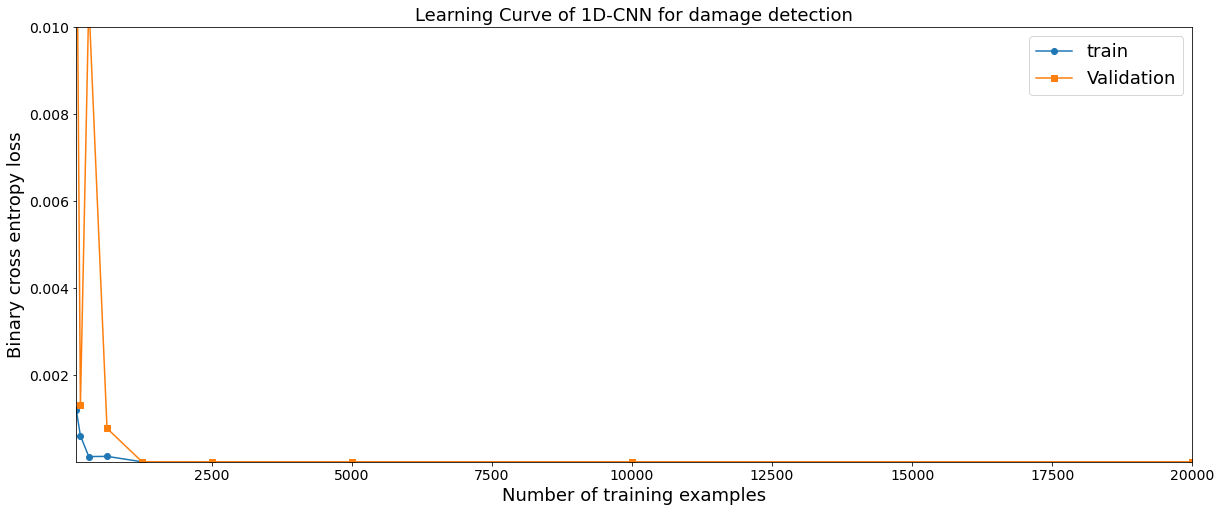

In [147]:
TrainLoss = [1.63e-10,1.5e-9,1.1e-9,3e-7,8e-7,1.25e-4,1.2e-4,6e-4,0.0012];
ValLoss = [2.54e-10,1.4e-9,1e-9,4e-7,1.5e-6,7.7e-4,0.0106,0.0013,0.0149];
m = [20000,10000,5000,2500,1250,625,300,150,75]

plt.figure(figsize=(20,8))
plt.plot(m,TrainLoss,'-o')
plt.plot(m,ValLoss,'-s')
plt.title('Learning Curve of 1D-CNN for damage detection',fontsize=18)
plt.ylabel('Binary cross entropy loss',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of training examples',fontsize=18)
plt.legend(['train', 'Validation'], loc='upper right',fontsize=18)
plt.axis([75,20000,1e-10,1e-2])